### Assignment 2 - Exploratory Data Analysis (EDA) for Amazon Sales Dataset

### Step 0: Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot') # Use stylesheet for plots
#plt.style.use('fivethirtyeight')
#pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', None)

%matplotlib inline

### Step 1: Reading Data and Data Understanding
- Read/Load Dataset

- Check Memory usage of the dataset. If large dataset, do the steps below as needed
    - Reduce the memory by removing unnecessary features/observations for the analysis
    - Reduce the memory by changing the datatype of the columns, float64->float16, int64->int16, object->category
    - Load dataset in chunks

- Check for basic information of the dataset
    - Check the number of observations and features of the Dataset
    - Top and bottom observations to understand the pattern
    - List the datatypes of the features

- Check for basic statistical information of the dataset

In [3]:
# Load Dataset
amazon_sales_df = pd.read_csv("amazon.csv")

In [4]:
# Check the memory
amazon_sales_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [102]:
num_observations = amazon_sales_df.shape[0]
num_features = amazon_sales_df.shape[1]
print(f"Number of Observations: {num_observations}\nNumber of Features: {num_features}")

Number of Observations: 1465
Number of Features: 13


In [6]:
amazon_sales_df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [7]:
amazon_sales_df.tail()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹2,219","₹3,080",28%,3.6,468,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...","₹1,399","₹1,890",26%,4,"8,031",Fan sweep area: 230 MM ; Noise level: (40 - 45...,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...","Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Havells-Ventilair-230mm-...
1464,B01486F4G6,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,863","₹3,690",22%,4.3,"6,987","Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...","AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...","Rajib,Ajay B,Vikas Kahol,PARDEEP,Anindya Prama...","R20RBRZ0WEUJT9,ROKIFK9R2ISSE,R30EEG2FNJSN5I,R2...","Works perfect,Ok good product,Nice Product. Re...",It does it job perfectly..only issue is temp c...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...


In [8]:
amazon_sales_df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


##### ************* Insights on dataset
- Memory usage is 8.9 MB, can be reduced by removing unnecessary columns and changing datatypes.
- There are 2 missing values for column 'rating_count' that need to be corrected.
- 'user_id', 'review_id', 'img_link' and 'product_link' columns can be removed from the analysis.
- datatypes of columns discounted_price, actual_price, discount_percentage, rating, rating_count should be changed to numeric as they are numeric features.

In [9]:
# Removing unnecessary columns without losing information for analysis

amazon_sales_df = amazon_sales_df[['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 
       #'user_id', 
       'user_name', 
       #'review_id', 
       'review_title',
       'review_content', 
       #'img_link', 'product_link'
       ]].copy()

In [10]:
# Correct discounted_price with appropriate values and change datatype to numeric since this is a numeric feature.

amazon_sales_df['discounted_price'] = amazon_sales_df['discounted_price'].str.extract('(\d+)')
amazon_sales_df['actual_price'] = amazon_sales_df['actual_price'].str.extract('(\d+)')
amazon_sales_df['discount_percentage'] = amazon_sales_df['discount_percentage'].str.extract('(\d+)')

amazon_sales_df['discounted_price'] = pd.to_numeric(amazon_sales_df['discounted_price'], errors='coerce')
amazon_sales_df['actual_price'] = pd.to_numeric(amazon_sales_df['actual_price'], errors='coerce')
amazon_sales_df['discount_percentage'] = pd.to_numeric(amazon_sales_df['discount_percentage'], errors='coerce')


In [11]:
# Correct rating_count with appropriate values and change datatype to numeric since this is a numeric feature.

amazon_sales_df['rating_count'].isnull().sum()
amazon_sales_df['rating_count'] = amazon_sales_df['rating_count'].str.replace(',','')
amazon_sales_df['rating_count'] = amazon_sales_df['rating_count'].fillna(0)

In [12]:
# Change datatype from 'object' to 'int'
amazon_sales_df['rating_count'] = pd.to_numeric(amazon_sales_df['rating_count'], errors='coerce')

In [13]:
# Change datatype from 'object' to 'float'
amazon_sales_df['rating'] = pd.to_numeric(amazon_sales_df['rating'], errors='coerce')

In [14]:
amazon_sales_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   int64  
 4   actual_price         1465 non-null   int64  
 5   discount_percentage  1465 non-null   int64  
 6   rating               1464 non-null   float64
 7   rating_count         1465 non-null   int64  
 8   about_product        1465 non-null   object 
 9   user_name            1465 non-null   object 
 10  review_title         1465 non-null   object 
 11  review_content       1465 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 7.3 MB


In [15]:
amazon_sales_df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1464.000000,1465.000000
mean,241.621160,236.903072,47.691468,4.096585,18270.564505
std,282.665623,347.419431,21.635905,0.291674,42729.995315
min,1.000000,1.000000,0.000000,2.000000,0.000000
25%,2.000000,2.000000,32.000000,4.000000,1173.000000
50%,150.000000,9.000000,50.000000,4.100000,5178.000000
75%,398.000000,499.000000,63.000000,4.300000,17325.000000
max,999.000000,999.000000,94.000000,5.000000,426973.000000


In [16]:
amazon_sales_df.describe(include='object')

,product_id,product_name,category,about_product,user_name,review_title,review_content
count,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,1293,1194,1194,1212
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa..."
freq,3,5,233,6,10,10,8


### Step 2: Data Preparation
- Drop irrelevant features and observations
- Identify and drop duplicate features and observations
- Replace features(columns) values with appropriate values
- Handle Missing Data

NOTE: ********************** All the above steps are taken care as part of previous inferences

### Step 3: Feature Understanding and Feature Relations
- Feature (Univariate) Analysis
    - Plotting Feature Distributions
    - Histogram
    - KDE
    - Boxplot
- Feature Relations
    - Bivariate Analysis
        - Scatterplot
        - Pairplot
        - Groupby Comparisons
    - Multivariate Analysis
        - Heatmap Correlation

## Step 4: Ask a question about the data
- Try to answer a question you have about the data using a plot or statistic

1. What is the average rating for each product category?
2. What are the top rating_count products by category?
3. What is the distribution of discounted prices vs. actual prices?
4. How does the average discount percentage vary across categories?
5. What are the most popular product names?
6. What are the most popular product keywords?
7. What are the most popular product reviews?
8. What is the correlation between discounted_price and rating?
9. What are the Top 5 categories based on the highest ratings?
10. Identify any potential areas for improvement or optimization based on the data analysis

#### 1. What is the average rating for each product category?

In [17]:
amazon_sales_df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_name', 'review_title', 'review_content'],
      dtype='object')

In [18]:
#amazon_sales_df[['category', 'rating']].groupby('category').describe()
amazon_sales_df[['category', 'rating']].groupby('category').mean()


,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.050000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|Webcams&VoIPEquipment|Webcams,4.200000
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors,4.033333
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|DVICables,4.400000
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|EthernetCables,4.400000


#### 2. What are the top rating_count products by category?

In [19]:
amazon_sales_df[['category', 'product_name', 'rating_count']].groupby('category').max().sort_values('rating_count', ascending=False).head(30)

,product_name,rating_count
category,,
"Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables",tizum HDMI to VGA Adapter Cable 1080P for Proj...,426973
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",realme Buds Wireless in Ear Bluetooth Earphone...,363713
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,"realme narzo 50i (Mint Green, 2GB RAM+32GB Sto...",313836
Home&Kitchen|Kitchen&Dining|KitchenTools|ManualChoppers&Chippers|Choppers,Pigeon Polypropylene Mini Handy and Compact Ch...,270563
Computers&Accessories|ExternalDevices&DataStorage|PenDrives,"SanDisk Ultra Flair 64GB USB 3.0 Pen Drive, Mu...",253105
Electronics|Accessories|MemoryCards|MicroSD,"SanDisk Ultra® microSDXC™ UHS-I Card, 64GB, 14...",205052
Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters,ZEBRONICS ZEB-USB150WF1 WiFi USB Mini Adapter ...,179692
Electronics|Mobiles&Accessories|MobileAccessories|Chargers|PowerBanks,URBN 20000 mAh lithium_polymer Power Bank with...,178912
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,realme 10W Fast Charging Micro-USB Cable (Brai...,178817


#### 3. What is the distribution of discounted prices vs. actual prices?

In [20]:
amazon_sales_df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_name', 'review_title', 'review_content'],
      dtype='object')

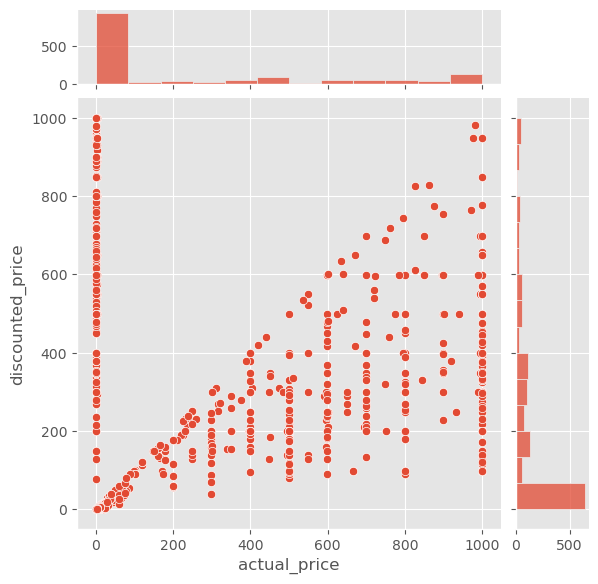

In [21]:
sns.jointplot(amazon_sales_df, x=amazon_sales_df['actual_price'], y=amazon_sales_df['discounted_price'], kind='scatter', palette='coolwarm', marginal_ticks=True)
plt.show()

#### 4. How does the average discount percentage vary across categories?

<Axes: ylabel='Frequency'>

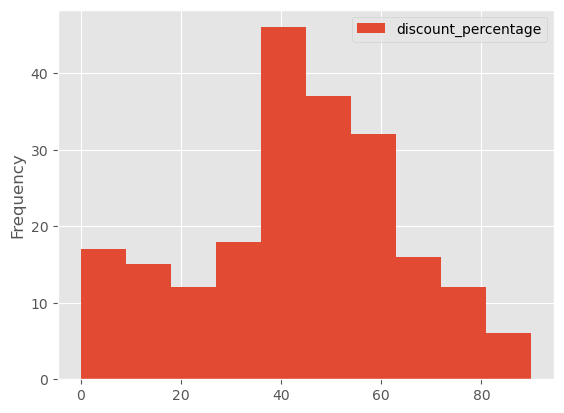

In [22]:
amazon_sales_df[['category', 'discount_percentage']].groupby('category').mean() \
.plot(kind='hist')

#### 5. What are the most popular product names?

In [23]:
popular_products = amazon_sales_df['product_name'].value_counts().sort_values(ascending=False)

print("Top 10 Most Popular Product Names and the Count:\n")
popular_products = popular_products.sort_values(ascending=False).head(10)

for item in popular_products.items():
    print(f" Product Name: {item[0]} \n Product Count: {item[1]}\n")

Top 10 Most Popular Product Names and the Count:

 Product Name: Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution 
 Product Count: 5

 Product Name: Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating 
 Product Count: 4

 Product Name: Portronics Konnect CL 20W POR-1067 Type-C to 8 Pin USB 1.2M Cable with Power Delivery & 3A Quick Charge Support, Nylon Braided for All Type-C and 8 Pin Devices, Green 
 Product Count: 3

 Product Name: Fire-Boltt India's No 1 Smartwatch Brand Talk 2 Bluetooth Calling Smartwatch with Dual Button, Hands On Voice Assistance, 60 Sports Modes, in Built Mic & Speaker with IP68 Rating 
 Product Count: 3

 Product Name: Flix Micro Usb Cable For Smartphone (Black) 
 Product Count: 3

 Product Name: AmazonBasics New Release Nylon USB-A to Lightning Cable Cord, Fast Char

#### 6. What are the most popular product keywords?

In [24]:
def extract_keywords(product_name):
  
    """Extracts keywords from a product name, handling potential numbers."""
    if isinstance(product_name, str):  # Check if it's a string
        keywords = product_name.lower().split()  # Split into words and lowercase
        keywords = [word for word in keywords if word.isalpha()]  # Remove non-alphabetical characters
    else:
        keywords = []  # Handle non-string values (e.g., integers) by returning an empty list
    return keywords

# Apply the function to extract keywords
amazon_sales_df["keywords"] = amazon_sales_df["product_name"].apply(extract_keywords)

# Flatten the list of keywords
all_keywords = [keyword for keywords in amazon_sales_df["keywords"] for keyword in keywords]

# Count keyword occurrences
keyword_counts = pd.Series(all_keywords).value_counts()

#top 10 most popular keywords
keyword_counts = keyword_counts.head(10)

# Display the top 10 most popular keywords
#print(keyword_counts.head(10))

print("Top 10 Most Popular Keywords:")
for keyword in keyword_counts.items():
    print(f"\n\t Keyword: \"{keyword[0]}\", Count: {keyword[1]}")

Top 10 Most Popular Keywords:

	 Keyword: "with", Count: 751

	 Keyword: "for", Count: 672

	 Keyword: "usb", Count: 377

	 Keyword: "and", Count: 330

	 Keyword: "cable", Count: 320

	 Keyword: "charging", Count: 219

	 Keyword: "to", Count: 218

	 Keyword: "fast", Count: 211

	 Keyword: "c", Count: 182

	 Keyword: "smart", Count: 171


#### 7. What are the most popular product reviews?

In [25]:
product_reviews = amazon_sales_df[['review_title', 'review_content']].value_counts().sort_values(ascending=False).head(10)

print("Top 10 Most Popular Product Reviews:\n")
for review in product_reviews.items():
    #print(review)
    print(f"Review Title: {review[0][0]}\nReview Content: {review[0][1]}\nCount: {review[1]}\n")

Top 10 Most Popular Product Reviews:

Review Title: Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good
Review Content: I am not big on camera usage, personally. I was even mentally prepared for a bad camera, based on some reviews here. But I was pleasantly surprised that camera clicks good photos. They are not awesome, but they are decent photos that can even be shared.Now coming to my biggest grouse; heating issue. The phone started heating up while charging, but it was just a little and so I could have ignored it. But then it started heating up more and got me very concerned. I even ordered a replacement thinking I got a defective piece. But then, after further tests, I found that it is heating more when I download huge amounts of data, for example, when I restore data of my old pho

#### 8. What is the correlation between discounted_price and rating?

In [71]:
amazon_sales_df['discount_percentage'].corr(amazon_sales_df['rating'])

-0.15537543972693008

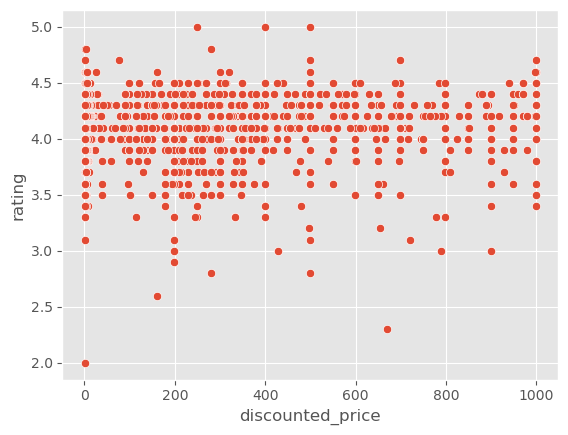

In [70]:
sns.scatterplot(amazon_sales_df, x='discounted_price', y='rating')
plt.show()

#### 9. What are the Top 5 categories based on the highest ratings?

In [28]:
# Top 5 categories based on highest ratings
amazon_sales_df[['category', 'rating', 'rating_count']].groupby('category').max().sort_values('rating', ascending=False).head(5)

,rating,rating_count
category,,
"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice",5.0,61314
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,5.0,178817
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders,4.8,18462
"Home&Kitchen|Heating,Cooling&AirQuality|WaterHeaters&Geysers|InstantWaterHeaters",4.8,53803
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|DeepFatFryers|AirFryers,4.8,3964


In [29]:
# Top 5 categories based on highest ratings count
amazon_sales_df[['category', 'rating', 'rating_count']].groupby('category').max().sort_values('rating_count', ascending=False).head(5)

,rating,rating_count
category,,
"Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables",4.6,426973
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",4.2,363713
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,4.4,313836
Home&Kitchen|Kitchen&Dining|KitchenTools|ManualChoppers&Chippers|Choppers,4.1,270563
Computers&Accessories|ExternalDevices&DataStorage|PenDrives,4.3,253105


#### 10. Identify any potential areas for improvement or optimization based on the data analysis

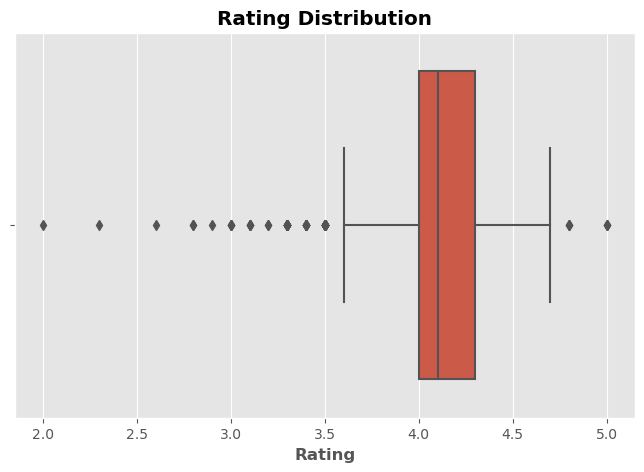

In [76]:
#Rating Distribution

fig, ax = plt.subplots(figsize=(8, 5))

sns.boxplot(ax=ax, data=amazon_sales_df, x='rating')

ax.set_xlabel('Rating', fontweight='bold')
ax.set_title('Rating Distribution', fontweight='heavy')

plt.show()

In [103]:
amazon_sales_df[amazon_sales_df['rating'] <= 3.5].shape[0]/num_observations

0.04641638225255973

##### ************* Areas of improvement
- There are around 4.5% products which reviews less than 3.5 that can be improved.